# Uber Reviews Sentiment Analysis

### Submitted by:
### > Archit Srivastava
### > Jatin Sahnan
### > Swati Yadav
### > Dipti Belurgikar
### > Kartikey Rai

# 

In [1]:
#Basic Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd

In [2]:
#Importing plotting libraries

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#Importing nltk & string library

#from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import string

In [4]:
# Importing sklearn library packages
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#Importing text blob for spelling correction
from textblob import TextBlob
from spellchecker import SpellChecker
from langdetect import detect

In [73]:
df = pd.read_csv('C:/ISB/Term-02/Text Analytics/Group Project/uber_reviews_itune.csv', encoding='cp1252')
df.head()

Author_Name                           Title  \
0         #NEVERUBER        Dishonest and Disgusting   
1           $$Heaven                      Free offer   
2  .Disappointed....                      Inaccurate   
3         .i. andrea                             bad   
4           -:deka:-  Double charged me for an order   

                                        Author_URL  App_Version  Rating  \
0  https://itunes.apple.com/us/reviews/id663331949  3.434.10005       1   
1  https://itunes.apple.com/us/reviews/id810421958  3.434.10005       2   
2   https://itunes.apple.com/us/reviews/id49598333  3.439.10000       2   
3  https://itunes.apple.com/us/reviews/id689880334  3.434.10005       1   
4  https://itunes.apple.com/us/reviews/id124963835  3.434.10005       1   

                                              Review              Date  
0  For half an hour, we tried EVERY UBER SERVICE ...  29-12-2020 01:14  
1  If I’m not eligible for the offer Stop floodin...  01-01-2021 23:17  
2  Consistently inaccurate Uber Eats ETA and the ...  15-01-2021 23:38  
3  i had my rides canceled back to back. they the...  08-12-2020 01:01  
4  Two of the same orders was added by accident. ...  15-12-2020 04:02

In [7]:
df.shape

(490, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Author_Name  490 non-null    object
 1   Title        490 non-null    object
 2   Author_URL   490 non-null    object
 3   App_Version  490 non-null    object
 4   Rating       490 non-null    int64 
 5   Review       490 non-null    object
 6   Date         490 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.9+ KB


## Data Pre-Processing

In [9]:
df.describe()

Rating
count  490.000000
mean     1.502041
std      1.009665
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      5.000000

In [8]:
# Dropping Author Name, URL, App Version & Title columns as we will be working on Reviews and Ratings

df = df.drop(['Author_Name', 'Author_URL', 'App_Version', 'Title'], axis=1)

# Correcting Date-Time format

df.loc[:,'Date'] = pd.to_datetime(df['Date'], utc=True)

# Reindexing the columns

new_cols = ["Date", "Review", "Rating"]
df = df.reindex(columns = new_cols)

df

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
485 2021-01-16 02:39:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                Review  Rating  
0    For half an hour, we tried EVERY UBER SERVICE ...       1  
1    If I’m not eligible for the offer Stop floodin...       2  
2    Consistently inaccurate Uber Eats ETA and the ...       2  
3    i had my rides canceled back to back. they the...       1  
4    Two of the same orders was added by accident. ...       1  
..                                                 ...     ...  
485  Perdí mi cuenta no la puedo recuperar la use e...       5  
486  Still the same. I was forced to use it in Colo...       1  
487  It is a 30 minute commute from my household to...       1  
488  Was sent a $30 off UBer Eats. I thought about ...       1  
489  At first Uber was okay but than things started...       1  

[490 rows x 3 columns]

In [9]:
# Plotting the distribution of target variable i.e. Rating.

ax = df.groupby('Rating').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Worst','Worse','Neutral','Good','Best'], rotation=0)
# Storing data in lists.

text, sentiment = list(df['Review']), list(df['Rating'])

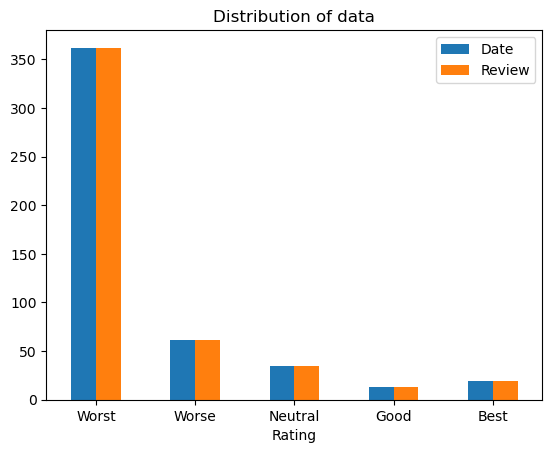

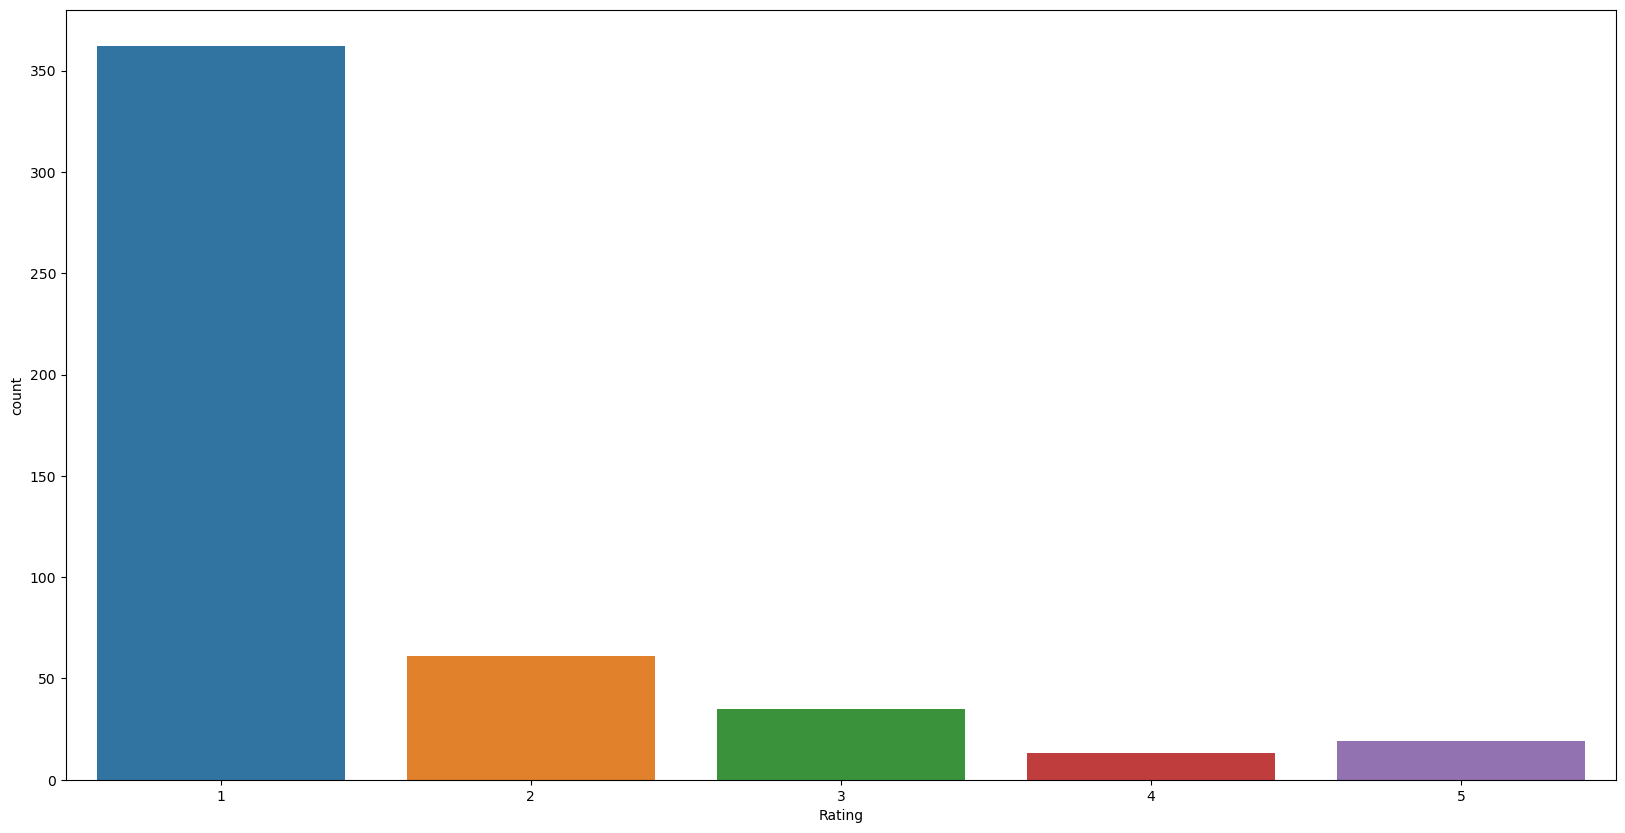

In [10]:
# basically getting outof total words how many are +ve & -ve from 'target' column
plt.figure(figsize=(20,10)) 
import seaborn as sns
sns.countplot(x='Rating', data=df)
plt.show()

In [11]:
#Punctuation function.
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',"'"))
    return final


In [12]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [13]:
#Cleaning and removing URL’s function
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [14]:
#Cleaning and removing Numerals function
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [15]:
#Cleaning and removing repeating characters function
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [16]:
#Removing the square brackets function
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [17]:
#Removing special characters function
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [18]:
df['Review']=df['Review'].str.lower()

In [19]:
#Using above data processing functions to our Review column of dataset.
df['Review'] = df['Review'].apply(lambda x: cleaning_punctuations(x))
df['Review'] = df['Review'].apply(remove_punctuation)
df['Review'] = df['Review'].apply(lambda x: cleaning_URLs(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_numbers(x))
df['Review'] = df['Review'].apply(lambda x: cleaning_repeating_char(x))
df['Review'] = df['Review'].apply(remove_between_square_brackets)
df['Review'] = df['Review'].apply(remove_special_characters)
df.head()

Date  \
0 2020-12-29 01:14:00+00:00   
1 2021-01-01 23:17:00+00:00   
2 2021-01-15 23:38:00+00:00   
3 2020-08-12 01:01:00+00:00   
4 2020-12-15 04:02:00+00:00   

                                              Review  Rating  
0  for half an hour we tried every uber service t...       1  
1  if im not eligible for the offer stop flooding...       2  
2  consistently inaccurate uber eats eta and the ...       2  
3  i had my rides canceled back to back they then...       1  
4  two of the same orders was added by accident t...       1

In [22]:
df.tail()

Date  \
485 2021-01-16 02:39:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                Review  Rating  
485  perd mi cuenta no la puedo recuperar la use el...       5  
486  still the same i was forced to use it in colom...       1  
487  it is a  minute commute from my household to m...       1  
488  was sent a  off uber eats i thought about plac...       1  
489  at first uber was okay but than things started...       1

In [20]:
#checking the languae of Review column

df['Language']=df['Review'].apply(detect)

In [21]:
#Checking the unique values in Language columnn
df.Language.nunique()

11

In [22]:
#checking the languages present in review columns
df.Language.value_counts()

en    459
es     16
pt      4
sl      2
nl      2
it      2
af      1
fr      1
so      1
cy      1
hr      1
Name: Language, dtype: int64

In [23]:
#As in Review column some reviews are not in english removing those& getting it in new df
df_new = df[df.Language== 'en']

In [24]:
#correcting the spellings 
from spellchecker import SpellChecker

spell  = SpellChecker()
def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

df_new['Review'].apply(lambda x: spell_check(x))

0      for half an hour we tried every uber service t...
1      if im not eligible for the offer stop flooding...
2      consistently inaccurate uber eats eta and the ...
3      i had my rides canceled back to back they then...
4      two of the same orders was added by accident t...
                             ...                        
484                 i dont like your mandatory face mask
486    still the same i was forced to use it in colom...
487    it is a minute commute from my household to my...
488    was sent a off uber eats i thought about placi...
489    at first uber was okay but than things started...
Name: Review, Length: 459, dtype: object

In [28]:
df_new.shape

(459, 4)

In [29]:
df_new.head()

Date  \
0 2020-12-29 01:14:00+00:00   
1 2021-01-01 23:17:00+00:00   
2 2021-01-15 23:38:00+00:00   
3 2020-08-12 01:01:00+00:00   
4 2020-12-15 04:02:00+00:00   

                                              Review  Rating Language  
0  for half an hour we tried every uber service t...       1       en  
1  if im not eligible for the offer stop flooding...       2       en  
2  consistently inaccurate uber eats eta and the ...       2       en  
3  i had my rides canceled back to back they then...       1       en  
4  two of the same orders was added by accident t...       1       en

In [25]:
#Removing stop words function
from nltk.corpus import stopwords
stopword_list=nltk.corpus.stopwords.words('english')
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwords(text))

In [26]:
##Adding few more words as stopword

stopwordlistt = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','app','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','being', 'below', 'back', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down','driver', 'during', 'each','few', 'for', 'from','further', 'get','had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'im','in','into','is', 'it', 'its', 'itself', 'ive','just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once','only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'still','such','than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those','through', 'to', 'too','uber','under', 'until', 'up', 've', 'very','want', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom','why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves','hasnt','wants']  

In [27]:
STOPWORDS = set(stopwordlistt)
def cleaning_stopwordss(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_new['Review'] = df_new['Review'].apply(lambda text: cleaning_stopwordss(text))
df_new.head()

Date  \
0 2020-12-29 01:14:00+00:00   
1 2021-01-01 23:17:00+00:00   
2 2021-01-15 23:38:00+00:00   
3 2020-08-12 01:01:00+00:00   
4 2020-12-15 04:02:00+00:00   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

## Basic Text & Sentiment Analysis

In [28]:
#Applying Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_new['Review']= df_new['Review'].apply(lambda x: stemming_on_text(x))
df_new['Review'].head()

0    half hour tried every service take short trip ...
1    eligible offer stop flooding email false infor...
2    consistently inaccurate eats eta food menus of...
3    rides canceled charged account cancellation fe...
4    two orders added accident restaurant tried rem...
Name: Review, dtype: object

In [29]:
#Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_new['Review']= df_new['Review'].apply(lambda x: lemmatizer_on_text(x))
df_new['Review'].head()

0    half hour tried every service take short trip ...
1    eligible offer stop flooding email false infor...
2    consistently inaccurate eats eta food menus of...
3    rides canceled charged account cancellation fe...
4    two orders added accident restaurant tried rem...
Name: Review, dtype: object

In [30]:
# spliting data frame into positive and negative rating sentiment, we will be neglecting ratings with 3 which is neutral
positive = df_new[df_new['Rating'] > 3]
negative = df_new[df_new['Rating'] < 3]

In [31]:
negative.head()

Date  \
0 2020-12-29 01:14:00+00:00   
1 2021-01-01 23:17:00+00:00   
2 2021-01-15 23:38:00+00:00   
3 2020-08-12 01:01:00+00:00   
4 2020-12-15 04:02:00+00:00   

                                              Review  Rating Language  
0  half hour tried every service take short trip ...       1       en  
1  eligible offer stop flooding email false infor...       2       en  
2  consistently inaccurate eats eta food menus of...       2       en  
3  rides canceled charged account cancellation fe...       1       en  
4  two orders added accident restaurant tried rem...       1       en

In [38]:
positive.head()

Date  \
24  2020-12-28 00:17:00+00:00   
29  2020-12-14 16:09:00+00:00   
77  2020-12-24 20:47:00+00:00   
102 2020-08-12 11:18:00+00:00   
150 2020-11-12 23:26:00+00:00   

                                                Review  Rating Language  
24   whenever friends go need rides home lit end ni...       5       en  
29   live north dakota need buy stuff people miami ...       5       en  
77   left star cause obviously ubers fault drivers ...       4       en  
102  nice respectful helped figure sounds simple co...       5       en  
150  updates sooo bloated well mb every time lyft l...       4       en

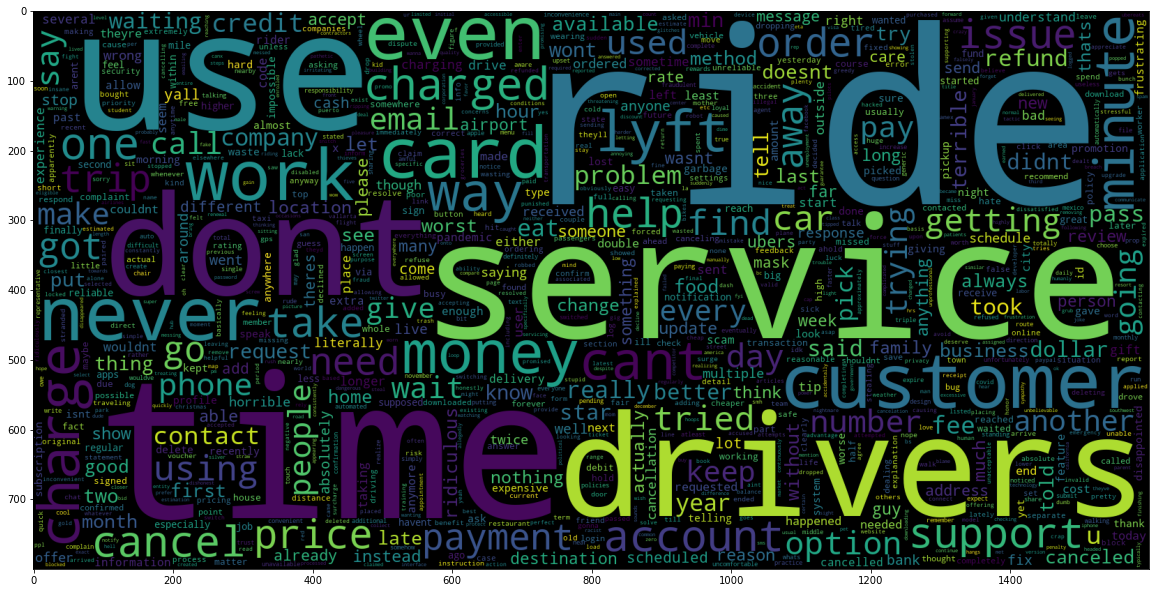

In [39]:
# Wordcloud for negative rating reviews
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative.Review))
plt.imshow(wc)
plt.show()

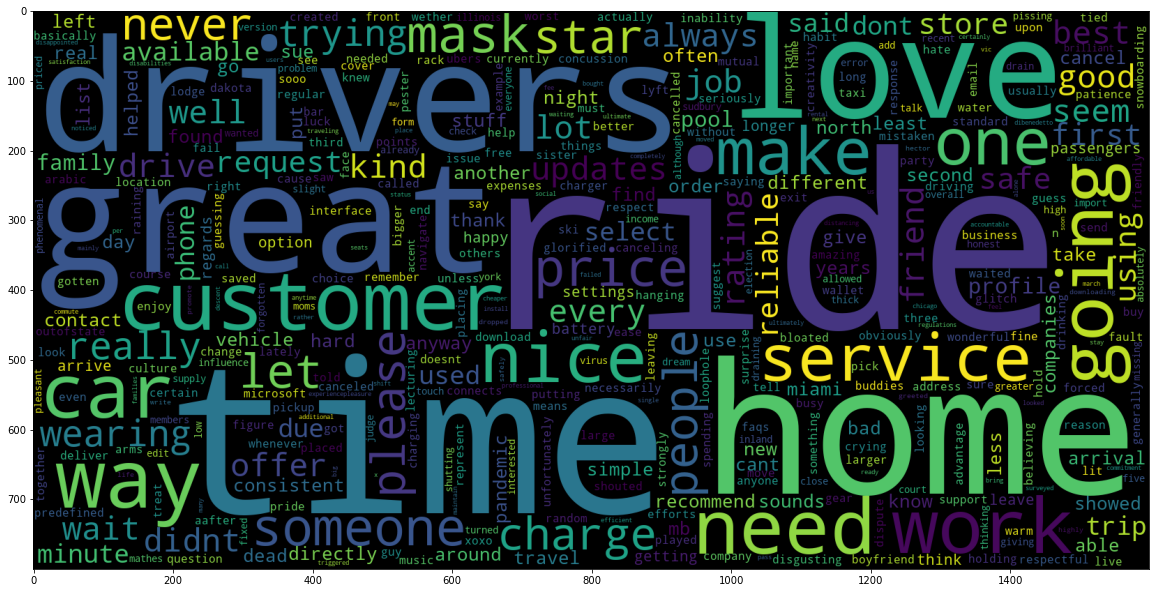

In [40]:
# Wordcloud for positive rating reviews
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive.Review))
plt.imshow(wc)
plt.show()

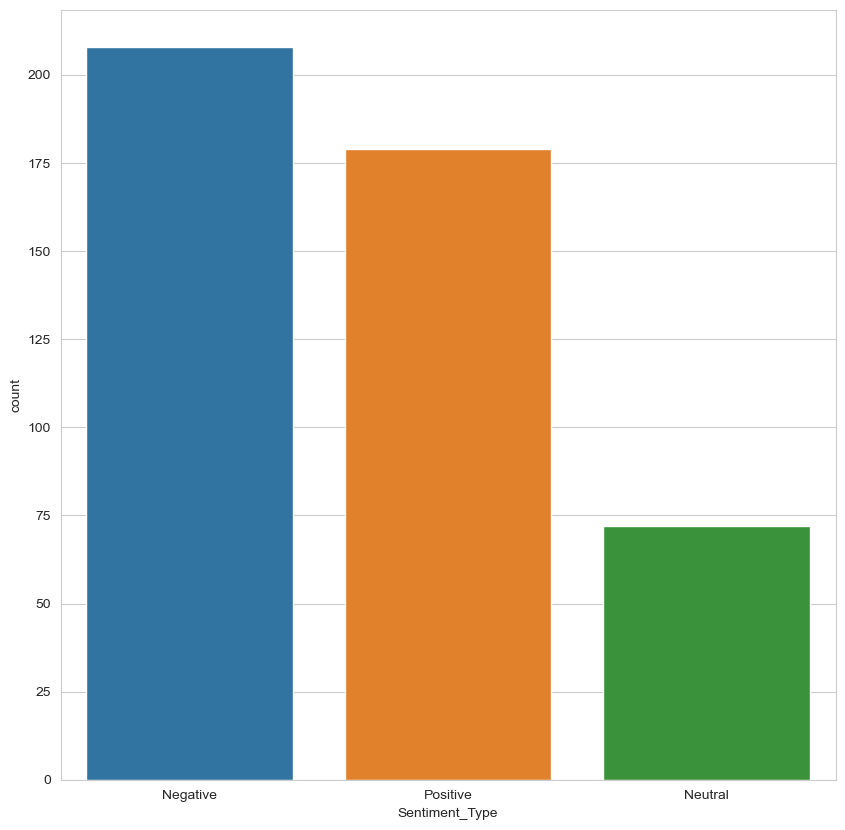

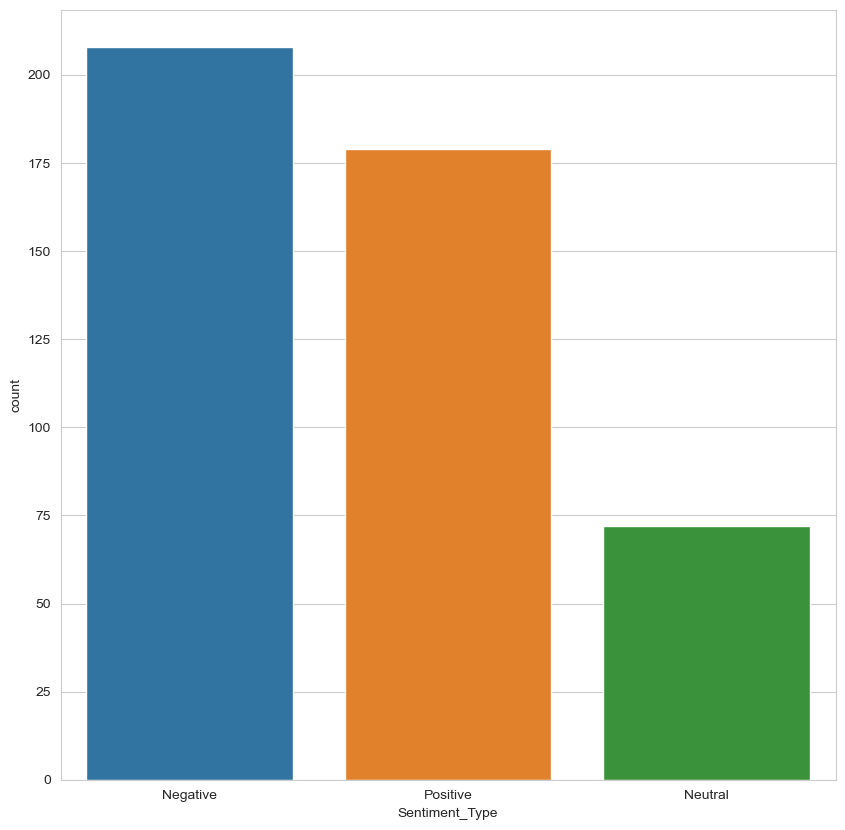

In [34]:
# Positive & Negative Sentiments segregation of Reviews using TextBlob

bloblist_desc = list()

uber_descr_str=df_new['Review'].astype(str)
for row in uber_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    uber_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(uber_polarity_desc):
    if uber_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif uber_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

uber_polarity_desc['Sentiment_Type'] = uber_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=uber_polarity_desc)
plt.show()


## Feature Construction

In [35]:
# Adding a column for weekday

df_new.loc[:, 'Weekday'] = pd.Series(df_new.Date).dt.day_name()
df_new

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
484 2020-11-12 17:44:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                Review  Rating Language  \
0    half hour tried every service take short trip ...       1       en   
1    eligible offer stop flooding email false infor...       2       en   
2    consistently inaccurate eats eta food menus of...       2       en   
3    rides canceled charged account cancellation fe...       1       en   
4    two orders added accident restaurant tried rem...       1       en   
..                                                 ...     ...      ...   
484                           like mandatory face mask       1       en   
486  forced use colombia since know ride sharing ap...       1       en   
487  minute commute household worksite tend use tim...       1       en   
488  sent eats thought placing order applied code c...       1       en   
489  first okay things started happening like extra...       1       en   

       Weekday  
0      Tuesday  
1       Friday  
2       Friday  
3    Wednesday  
4      Tuesday  
..         ...  
484   Thursday  
486  Wednesday  
487  Wednesday  
488  Wednesday  
489    Tuesday  

[459 rows x 5 columns]

In [36]:
# Positive Ratings compared to Weekdays

p_uber = df_new[df_new.Rating > 3]
p_uber.head()

Date  \
24  2020-12-28 00:17:00+00:00   
29  2020-12-14 16:09:00+00:00   
77  2020-12-24 20:47:00+00:00   
102 2020-08-12 11:18:00+00:00   
150 2020-11-12 23:26:00+00:00   

                                                Review  Rating Language  \
24   whenever friends go need rides home lit end ni...       5       en   
29   live north dakota need buy stuff people miami ...       5       en   
77   left star cause obviously ubers fault seem wor...       4       en   
102  nice respectful helped figure sounds simple co...       5       en   
150  updates sooo bloated well mb every time lyft l...       4       en   

       Weekday  
24      Monday  
29      Monday  
77    Thursday  
102  Wednesday  
150   Thursday

<Figure size 2000x1000 with 0 Axes>

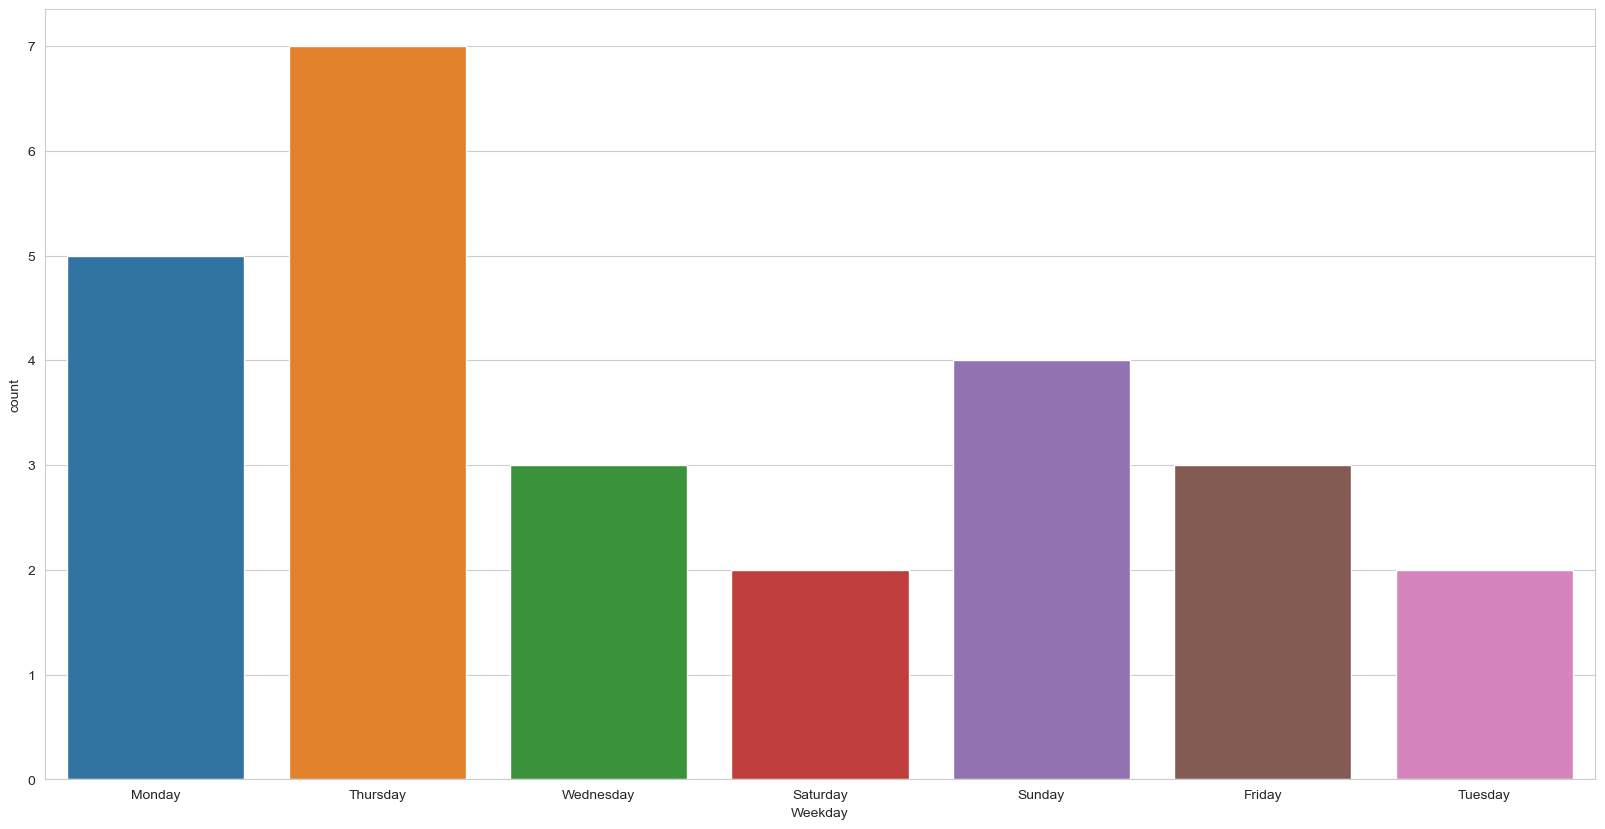

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(x='Weekday', data=p_uber)
plt.show()

In [38]:
# Negative Ratings compared to Weekdays

n_uber = df_new[df_new.Rating < 3]
n_uber.head()

Date  \
0 2020-12-29 01:14:00+00:00   
1 2021-01-01 23:17:00+00:00   
2 2021-01-15 23:38:00+00:00   
3 2020-08-12 01:01:00+00:00   
4 2020-12-15 04:02:00+00:00   

                                              Review  Rating Language  \
0  half hour tried every service take short trip ...       1       en   
1  eligible offer stop flooding email false infor...       2       en   
2  consistently inaccurate eats eta food menus of...       2       en   
3  rides canceled charged account cancellation fe...       1       en   
4  two orders added accident restaurant tried rem...       1       en   

     Weekday  
0    Tuesday  
1     Friday  
2     Friday  
3  Wednesday  
4    Tuesday

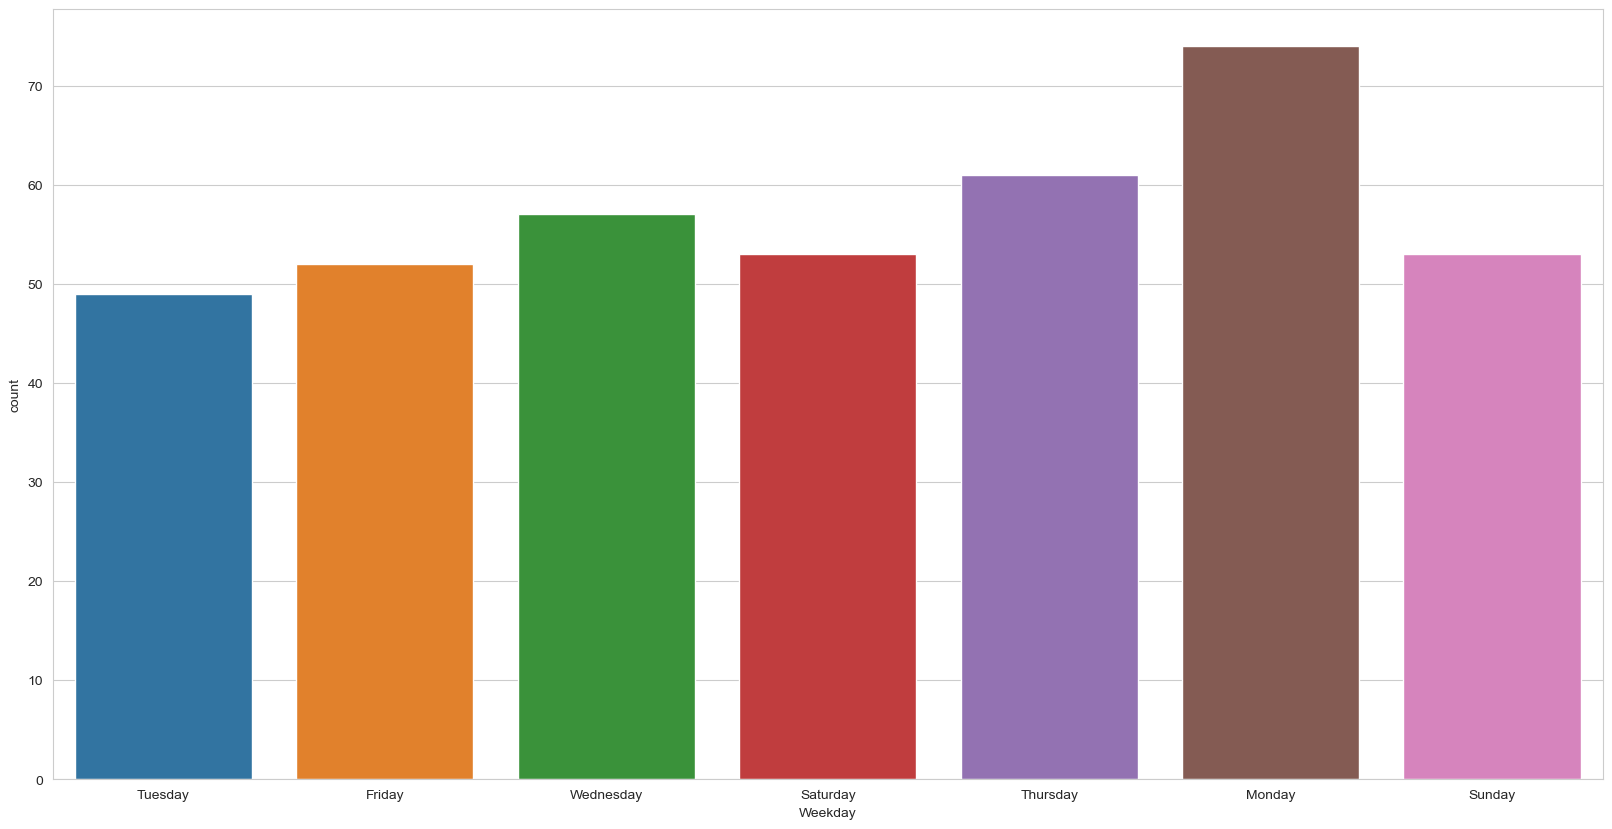

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x='Weekday', data=n_uber)
plt.show()

### Most positive ratings received are on Thursday and most Negative ratings received are on Monday.

# 

## Feature Extraction using Countvectorizer & Supervised learning using Logistic Regression

In [41]:
#creating new binary column based on Rating
df_new['Rating_binary'] = np.where(df_new['Rating'] >= 3, 1, 0)
df_new

Date  \
0   2020-12-29 01:14:00+00:00   
1   2021-01-01 23:17:00+00:00   
2   2021-01-15 23:38:00+00:00   
3   2020-08-12 01:01:00+00:00   
4   2020-12-15 04:02:00+00:00   
..                        ...   
484 2020-11-12 17:44:00+00:00   
486 2020-12-23 00:15:00+00:00   
487 2020-12-16 19:10:00+00:00   
488 2020-11-25 23:06:00+00:00   
489 2020-05-12 12:19:00+00:00   

                                                Review  Rating Language  \
0    half hour tried every service take short trip ...       1       en   
1    eligible offer stop flooding email false infor...       2       en   
2    consistently inaccurate eats eta food menus of...       2       en   
3    rides canceled charged account cancellation fe...       1       en   
4    two orders added accident restaurant tried rem...       1       en   
..                                                 ...     ...      ...   
484                           like mandatory face mask       1       en   
486  forced use colombia since know ride sharing ap...       1       en   
487  minute commute household worksite tend use tim...       1       en   
488  sent eats thought placing order applied code c...       1       en   
489  first okay things started happening like extra...       1       en   

       Weekday  Rating_binary  
0      Tuesday              0  
1       Friday              0  
2       Friday              0  
3    Wednesday              0  
4      Tuesday              0  
..         ...            ...  
484   Thursday              0  
486  Wednesday              0  
487  Wednesday              0  
488  Wednesday              0  
489    Tuesday              0  

[459 rows x 6 columns]

In [44]:
#splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(df_new['Review'], df_new['Rating_binary'], random_state = 0)

#setting random number between 1 and 1000

import random
number = random.randint(1,1000)

#printing random training text and X_train shape

print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
glitches told pick addresses miles away
 
X_train shape: (344,)


In [45]:
#creating variable which assigns X_train to numbers

vect = CountVectorizer(stop_words='english', ngram_range=(1,1)).fit(X_train)

#translates numbers back to text

vect.get_feature_names()[1:10]

['ability',
 'able',
 'abomination',
 'absolute',
 'absolutely',
 'abusing',
 'accent',
 'accept',
 'acceptable']

In [46]:
#length of total words

len(vect.get_feature_names())

2235

In [47]:
#creating matrix array for logistic regression

X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
#creating log regression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [49]:
#calculating AUC

from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.494949494949495


In [50]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())

#creating array of all the regression coefficients per word
coef_index = model.coef_[0]

#creating dataframe with both arrays in it
df1 = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})

#sorting by coefficient
df1.sort_values('Coef')

Word      Coef
2100      use -0.677646
865      help -0.530455
2023     trip -0.517147
1981    times -0.480448
1321      pay -0.480309
...       ...       ...
1977     time  0.705026
1582  request  0.762032
204      best  0.891143
817     great  1.103463
1101     love  1.281442

[2235 rows x 2 columns]

In [51]:
# Negative Word Sentiment Data frame

neg = df1[df1.Coef < 0]
neg

Word      Coef
1         ability -0.028806
3     abomination -0.019334
4        absolute -0.063437
5      absolutely -0.015517
6         abusing -0.023666
...           ...       ...
2223         yeah -0.029646
2226       yeeesh -0.015164
2228    yesterday -0.132280
2231        young -0.007940
2233         zero -0.037898

[1749 rows x 2 columns]

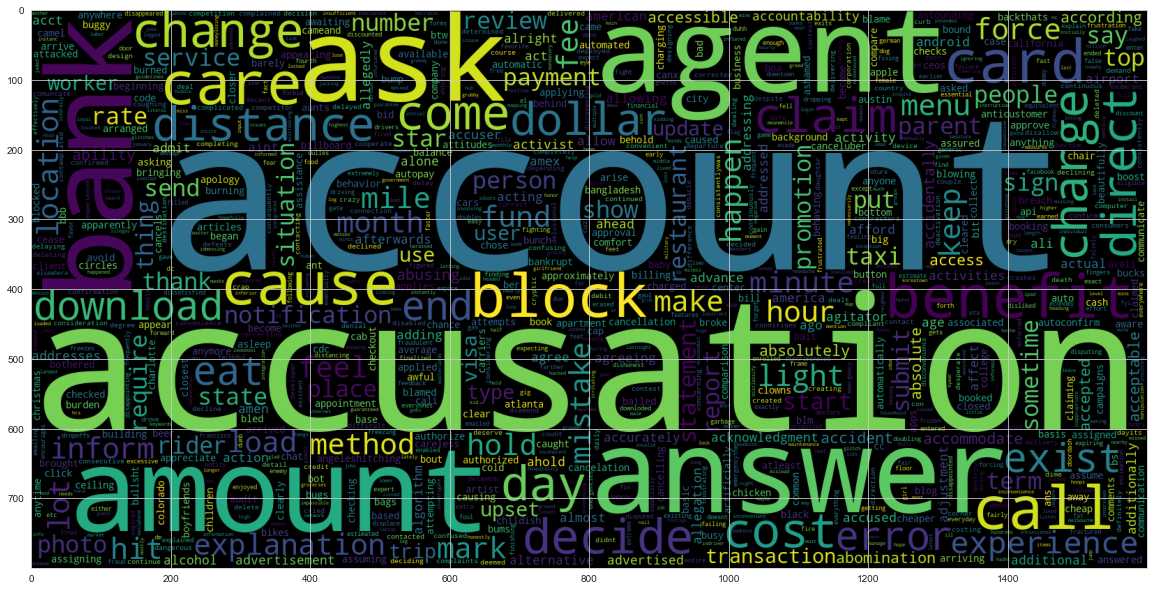

In [68]:
# Wordcloud for negative coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg.Word))
plt.imshow(wc)
plt.show()

In [52]:
# Positive Word Sentiment Data frame

pos = df1[df1.Coef > 0]
pos

Word      Coef
0        aafter  0.045727
2          able  0.303139
7        accent  0.137774
8        accept  0.054616
11    accepting  0.029997
...         ...       ...
2227        yes  0.028810
2229         yk  0.093219
2230       york  0.154993
2232         yu  0.375844
2234       zone  0.074403

[486 rows x 2 columns]

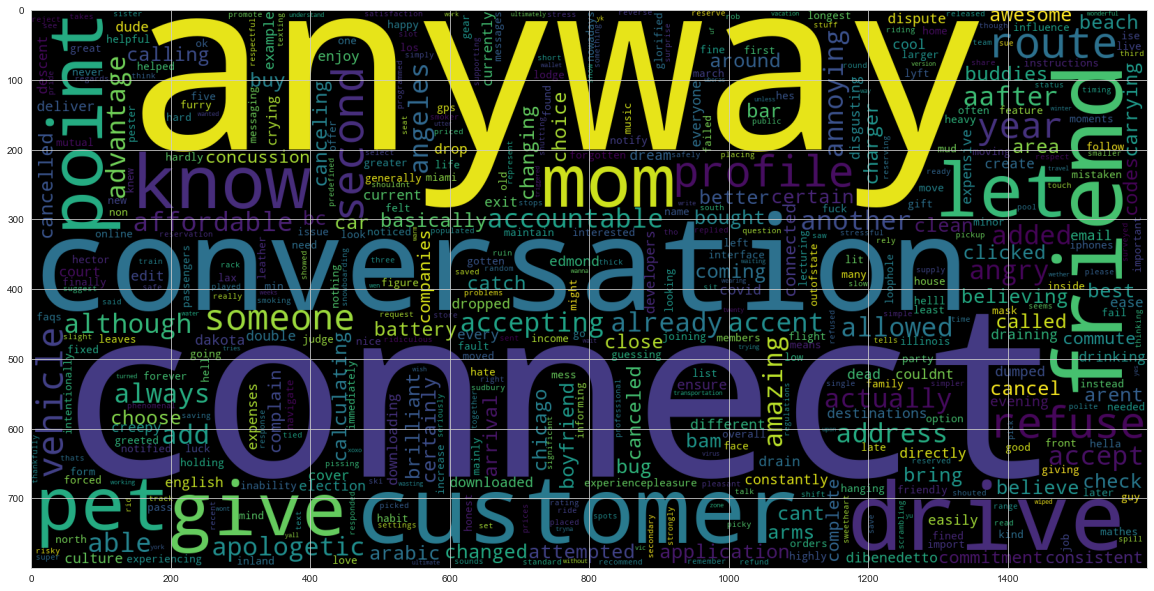

In [70]:
# Wordcloud for positive coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos.Word))
plt.imshow(wc)
plt.show()

# 

## Testing Custom Reviews by above model

In [53]:
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[0]
[0]
[0]
[0]
[0]
[0]


# 

## Feature Extraction using TF-IDF vectorizer & Supervised learning using Logistic Regression

In [54]:
#making the variable to test & train
# Separating the 80% data for training data and 20% for testing data

X_train, X_test, y_train, y_test = train_test_split(df_new['Review'], df_new['Rating_binary'],test_size = 0.20, random_state =1000)

In [55]:
#Transforming Dataset using TF-IDF Vectorizer
#removing terms 
#tfidf_vectorizer = TfidfVectorizer(stop_words = 'english)
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
print('\n\n',vectoriser.get_feature_names())

No. of feature_words:  11242


 ['aafter', 'aafter night', 'ability', 'ability address', 'ability airport', 'able', 'able call', 'able cancel', 'able edit', 'able even', 'able pick', 'able refund', 'able remove', 'able request', 'able ride', 'able schedule', 'able see', 'able solve', 'able speak', 'able touch', 'able trip', 'able use', 'absolute', 'absolute bums', 'absolute garbage', 'absolute rubbish', 'absolute sweetheart', 'absolute worst', 'absolutely', 'absolutely awful', 'absolutely forget', 'absolutely help', 'absolutely insane', 'absolutely need', 'absolutely never', 'absolutely phenomenal', 'absolutely reason', 'absolutely ridiculous', 'absolutely terrible', 'absolutely unacceptable', 'absolutely way', 'accent', 'accent spoke', 'accept', 'accept assume', 'accept business', 'accept cant', 'accept car', 'accept card', 'accept completely', 'accept cool', 'accept open', 'accept payment', 'accept price', 'accept ride', 'accept rides', 'accept trip', 'accept waste', 'acceptable', 'a

In [74]:
print(vectoriser)

TfidfVectorizer(ngram_range=(1, 2))


In [56]:
#Transform the data using TF-IDF Vectorizer for both tes & train
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [57]:
#print(X_train)

print(X_train)

  (0, 11157)	0.08607913181141022
  (0, 11146)	0.06126260827177498
  (0, 10991)	0.08607913181141022
  (0, 10935)	0.03920408966425323
  (0, 10460)	0.08607913181141022
  (0, 10458)	0.04643660347173708
  (0, 10397)	0.08607913181141022
  (0, 10370)	0.05727810642008029
  (0, 10334)	0.08607913181141022
  (0, 10332)	0.1044442399152574
  (0, 10176)	0.08607913181141022
  (0, 10175)	0.08607913181141022
  (0, 10173)	0.1529575800286005
  (0, 9951)	0.08607913181141022
  (0, 9935)	0.048571646729653875
  (0, 9462)	0.08607913181141022
  (0, 9456)	0.0548979175501143
  (0, 9374)	0.08607913181141022
  (0, 9362)	0.08607913181141022
  (0, 9360)	0.11455621284016058
  (0, 9244)	0.08607913181141022
  (0, 9243)	0.07647879001430025
  (0, 9185)	0.08607913181141022
  (0, 9149)	0.046838091452420696
  (0, 9100)	0.08607913181141022
  :	:
  (365, 2043)	0.09560165765145898
  (365, 2026)	0.1160641878049205
  (365, 1666)	0.08150675526238925
  (365, 1630)	0.046397858247963254
  (365, 872)	0.16987855120480608
  (365, 871)	

In [77]:
#print(X_test)

print(X_test)

  (0, 10939)	0.21550142787901494
  (0, 10592)	0.3083781571652556
  (0, 10582)	0.1663589525391774
  (0, 8126)	0.3083781571652556
  (0, 7994)	0.21907753823175674
  (0, 7850)	0.25386624485726506
  (0, 7846)	0.23959178236687687
  (0, 5689)	0.22851964907035183
  (0, 5247)	0.22851964907035183
  (0, 5031)	0.24621746063408115
  (0, 4141)	0.3083781571652556
  (0, 4114)	0.1663589525391774
  (0, 3226)	0.2021904690780991
  (0, 2327)	0.3083781571652556
  (0, 2321)	0.24621746063408115
  (0, 1396)	0.16360163871303082
  (0, 868)	0.2337475199484639
  (1, 10748)	0.20080236605043417
  (1, 10736)	0.2607964777741064
  (1, 10170)	0.12616053155625997
  (1, 9906)	0.2148171288354067
  (1, 9110)	0.20080236605043417
  (1, 8434)	0.1669003383823612
  (1, 8424)	0.1501189267827827
  (1, 8421)	0.18314585307705103
  :	:
  (90, 3558)	0.13162786243192343
  (90, 3182)	0.14815103793108014
  (90, 3153)	0.06591056824666175
  (90, 2739)	0.11828779536465765
  (90, 2606)	0.09099024216900432
  (90, 2183)	0.1384855998712389
  (9

In [58]:
#Function For Model Evaluation for confusion matrix
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [59]:
#Model: Logistic Regression using tdf-if
LRmodel = LogisticRegression(solver='liblinear',C = 2, max_iter = 100000,random_state=100000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
print('Our prediction of rating would be',y_pred3)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       0.00      0.00      0.00        10

    accuracy                           0.89        92
   macro avg       0.45      0.50      0.47        92
weighted avg       0.79      0.89      0.84        92

Our prediction of rating would be [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


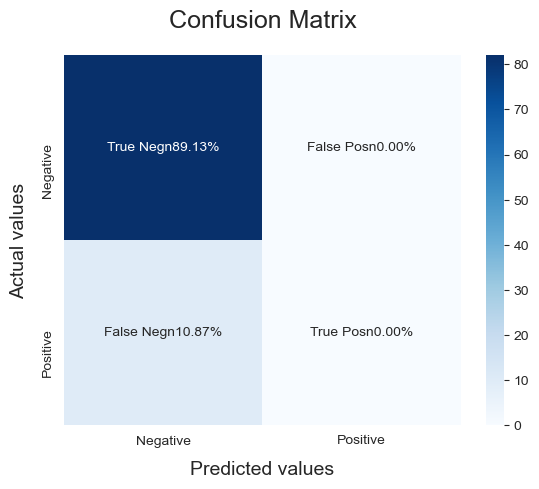

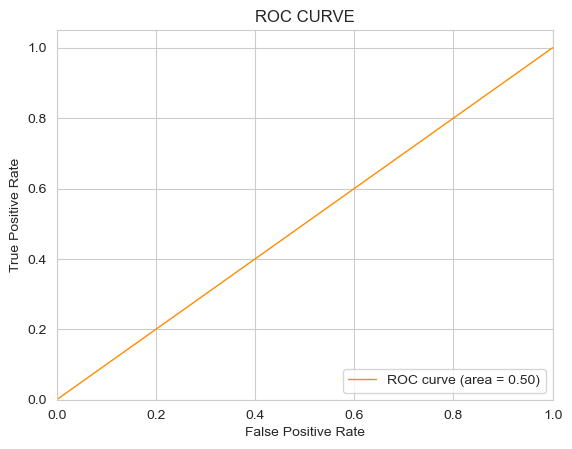

In [60]:
#Plot the ROC-AUC Curve for model with Linear regression of tf-idf
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [61]:
#creating array variable of all the words
feature_names_tf = np.array(vectoriser.get_feature_names())

#creating array of all the regression coefficients per word
coef_index_tf = LRmodel.coef_[0]

#creating dataframe with both arrays in it
df2 = pd.DataFrame({'Word':feature_names_tf, 'Coef': coef_index_tf})

#sorting by coefficient
df2.sort_values('Coef')

Word      Coef
10332      use -0.705549
4209      help -0.482989
1399      card -0.482256
6169    number -0.427393
9149   support -0.405666
...        ...       ...
9629      time  0.774149
4308      home  0.786655
953       best  0.791619
4025     great  0.994758
5284      love  1.236215

[11242 rows x 2 columns]

In [62]:
# Negative Word Sentiment Data frame

neg_tf = df2[df2.Coef < 0]
neg_tf

Word      Coef
2                   ability -0.032954
3           ability address -0.021729
4           ability airport -0.013525
6                 able call -0.014204
7               able cancel -0.056155
...                     ...       ...
11233                 young -0.038067
11234             young man -0.010674
11235            young star -0.030050
11238                  zero -0.022367
11239  zero professionalism -0.022367

[9319 rows x 2 columns]

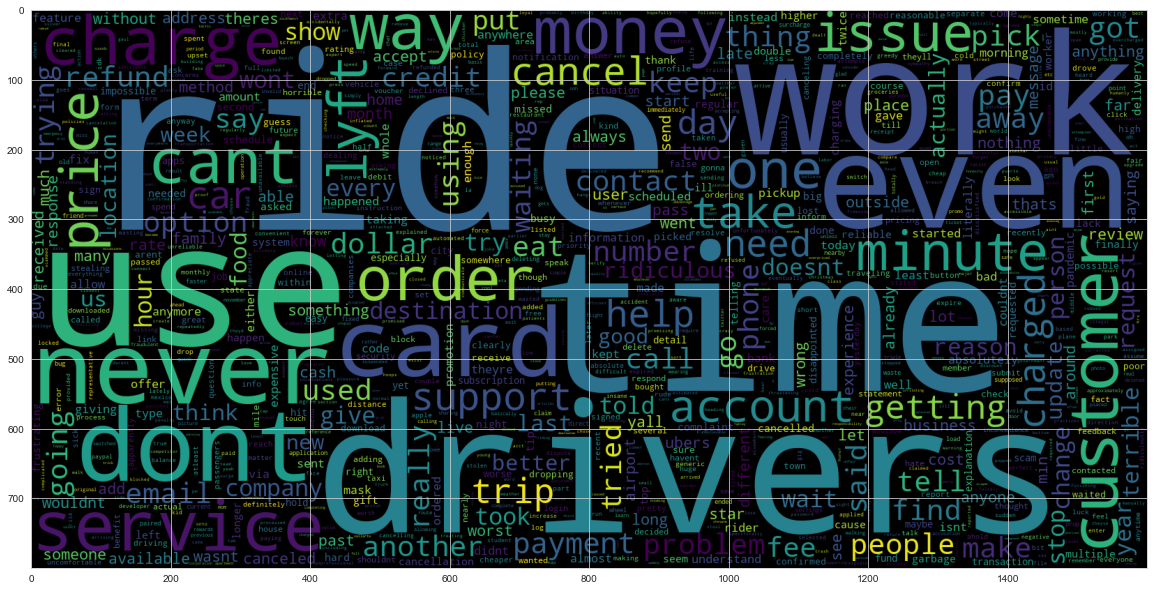

In [85]:
# Wordcloud for negative coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_tf.Word))
plt.imshow(wc)
plt.show()

In [63]:
# Negative Word Sentiment Data frame

pos_tf = df2[df2.Coef > 0]
pos_tf

Word      Coef
0             aafter  0.089996
1       aafter night  0.089996
5               able  0.347544
8          able edit  0.264233
10         able pick  0.268347
...              ...       ...
11231      york like  0.200819
11236             yu  0.341155
11237         yu set  0.341155
11240           zone  0.107979
11241  zone canceled  0.107979

[1923 rows x 2 columns]

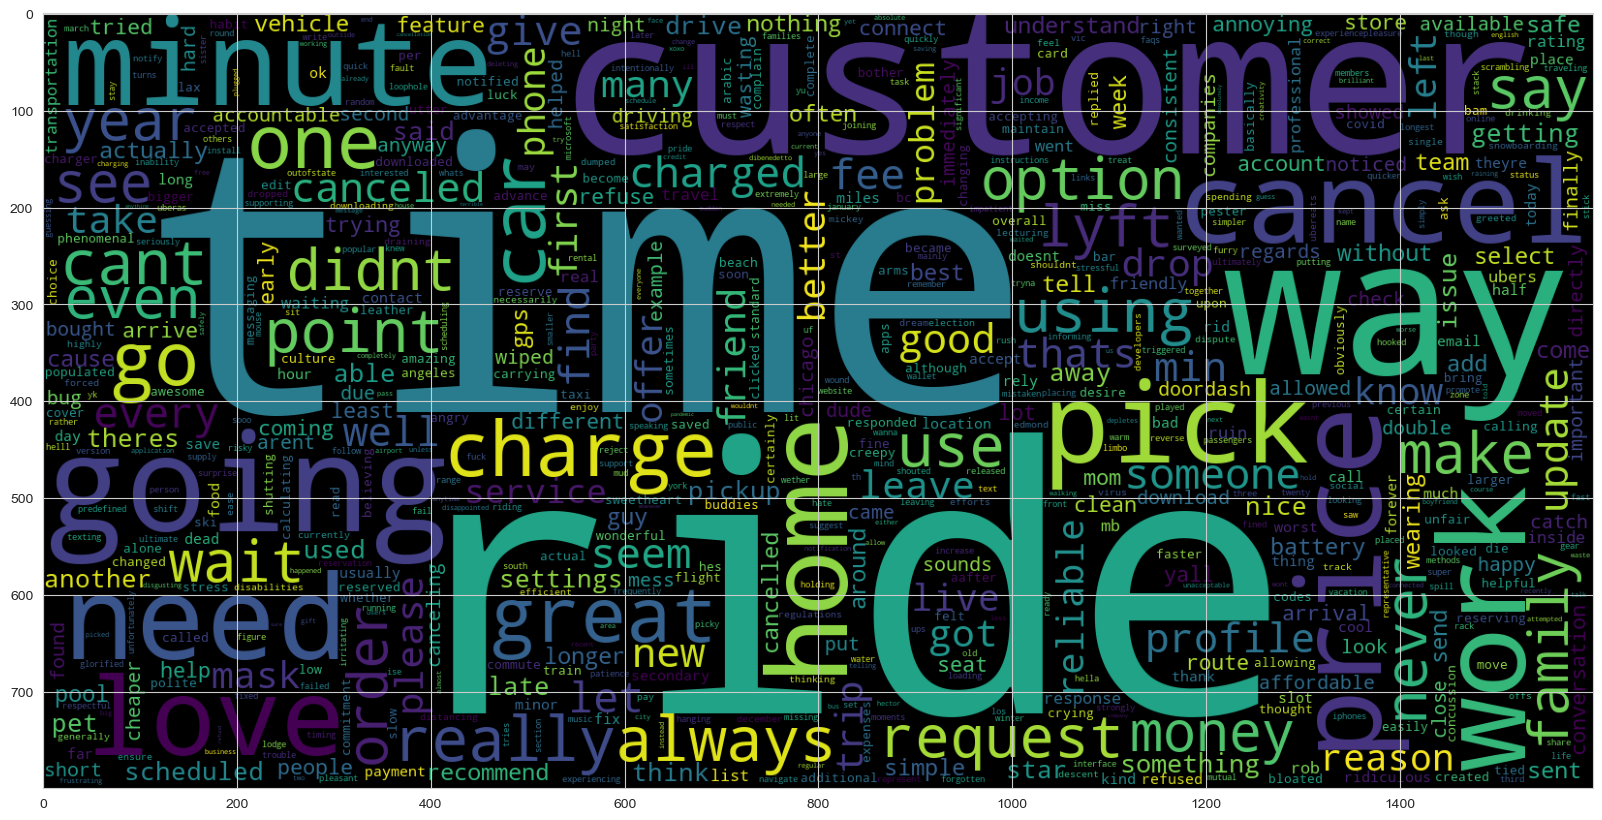

In [64]:
# Wordcloud for positive coefficient words

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos_tf.Word))
plt.imshow(wc)
plt.show()

# 

## Testing Custom Reviews by above model

In [72]:
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[0]
[0]
[0]
[0]
[0]
[0]


## Model Observation

### It has been observed that the AUC score is similar for both TF-IDF and Count Vectoriser model, i.e. 0.5. Also, another notable observation is that such low AUC score is pertaining to the fact that the input data is highly unbalanced. We could have used Oversampling to correct the data, but it is out of scope for now.